In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
def loadData(path):
    listOfFiles = os.listdir(path='cifar-10-batches-py/')
    train = []
    train_labels = []
        
    for i in range (1,6):
        print("Train files = ",listOfFiles[i])
    #For collecting Training data:
    for file in listOfFiles[1:6]:
        with open(path+file,'rb') as fo:              #Reading the training data
            dict = pickle.load(fo,encoding='bytes')
            train.append(dict[b'data'])
            train_labels.append(dict[b'labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    return dictData

In [3]:
#load dataset
dataset = loadData(path='cifar-10-batches-py/')

Train files =  data_batch_1
Train files =  data_batch_2
Train files =  data_batch_3
Train files =  data_batch_4
Train files =  data_batch_5


In [4]:
dataset['train_data'].shape[0]
labels = {}
labels = {0 : "airplane", 1 : "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog",
          7 : "horse", 8 : "ship", 9 : "truck"} #Creating a dictionary to identify labels

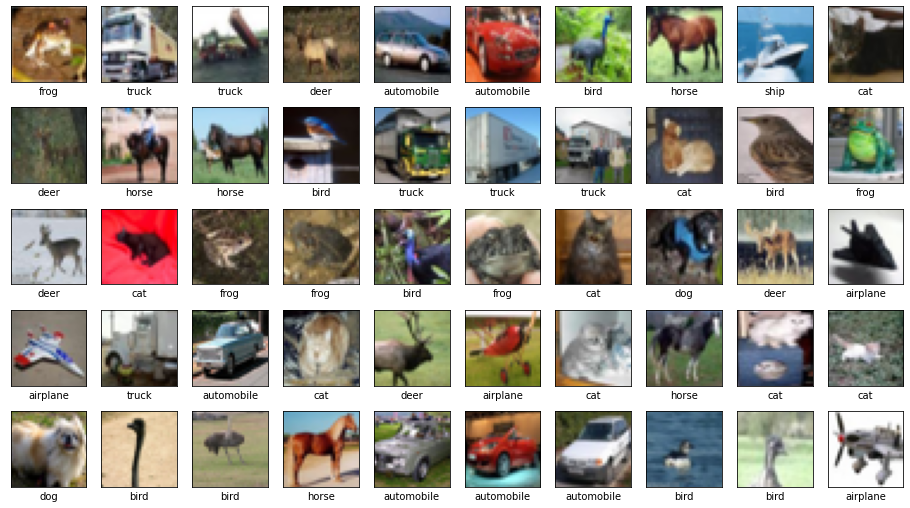

In [5]:
#cheking random images from training data
temp_ran = dataset['train_data'][1000]
plt.figure(figsize=(16,9))
for i in range (50):
    plt.subplot(5,10, i+1)
    plt.xticks([])
    plt.yticks([])
    r = dataset['train_data'][i][0:1024].reshape(32,32)
    g = dataset['train_data'][i][1024:2048].reshape(32,32)
    b = dataset['train_data'][i][2048:3072].reshape(32,32)

    final_image = np.dstack((r,g,b))        #Stacking all the three channels which are R,G and B
    plt.imshow(final_image)
    plt.xlabel(labels[dataset['train_labels'][i]])
plt.show()

 

In [6]:
X_train = dataset['train_data'][0:5000]          #Getting dataset 
y_train = dataset['train_labels'][0:5000]
X_train.shape


(5000, 3072)

In [7]:
class kNearestNeighbour(object):                                  #Creating a KNN class 
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
       
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        
        #Calculating the l1 distance 
        for i in range(test_samples):
            print("Process Ongoing = ",i,end="\n")
            
            
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)  
            
           
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #iterates over min_ind 
            #Max value at any index returned using np.argmax()
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)
    
    
        return Ypred

In [8]:
num_folds = 5
num_training = 50000

k_choices = [1,2,3,4,5,6,7,8,9,10]

if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Not Divisible!')

In [9]:
# Split training set
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

In [10]:
# accuracy values that we found when using that value of k.
k_to_accuracies = {}

In [11]:
# Perform k-fold cross validation to find the best value of k
for k in range(1,11):
    k_to_accuracies[k] = []

In [12]:
for idx in range(num_folds):
    # Use bin with index idx as validation set
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]

    # Train kNN
    knn = kNearestNeighbour()
    knn.train(X_train_set, y_train_set)
 
    
    for k in k_choices:
        # Predict labels for validation set
        y_validation_pred = knn.predict(X_validation_set,k)
        # Check accuracy
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)

Process Ongoing =  0
Process Ongoing =  1
Process Ongoing =  2
Process Ongoing =  3
Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  21
Process Ongoing =  22
Process Ongoing =  23
Process Ongoing =  24
Process Ongoing =  25
Process Ongoing =  26
Process Ongoing =  27
Process Ongoing =  28
Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  4

Process Ongoing =  362
Process Ongoing =  363
Process Ongoing =  364
Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ongoing =  381
Process Ongoing =  382
Process Ongoing =  383
Process Ongoing =  384
Process Ongoing =  385
Process Ongoing =  386
Process Ongoing =  387
Process Ongoing =  388
Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ong

Process Ongoing =  719
Process Ongoing =  720
Process Ongoing =  721
Process Ongoing =  722
Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ongoing =  739
Process Ongoing =  740
Process Ongoing =  741
Process Ongoing =  742
Process Ongoing =  743
Process Ongoing =  744
Process Ongoing =  745
Process Ongoing =  746
Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ong

Process Ongoing =  80
Process Ongoing =  81
Process Ongoing =  82
Process Ongoing =  83
Process Ongoing =  84
Process Ongoing =  85
Process Ongoing =  86
Process Ongoing =  87
Process Ongoing =  88
Process Ongoing =  89
Process Ongoing =  90
Process Ongoing =  91
Process Ongoing =  92
Process Ongoing =  93
Process Ongoing =  94
Process Ongoing =  95
Process Ongoing =  96
Process Ongoing =  97
Process Ongoing =  98
Process Ongoing =  99
Process Ongoing =  100
Process Ongoing =  101
Process Ongoing =  102
Process Ongoing =  103
Process Ongoing =  104
Process Ongoing =  105
Process Ongoing =  106
Process Ongoing =  107
Process Ongoing =  108
Process Ongoing =  109
Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process 

Process Ongoing =  438
Process Ongoing =  439
Process Ongoing =  440
Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ongoing =  459
Process Ongoing =  460
Process Ongoing =  461
Process Ongoing =  462
Process Ongoing =  463
Process Ongoing =  464
Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ong

Process Ongoing =  796
Process Ongoing =  797
Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ongoing =  816
Process Ongoing =  817
Process Ongoing =  818
Process Ongoing =  819
Process Ongoing =  820
Process Ongoing =  821
Process Ongoing =  822
Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ong

Process Ongoing =  158
Process Ongoing =  159
Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ongoing =  178
Process Ongoing =  179
Process Ongoing =  180
Process Ongoing =  181
Process Ongoing =  182
Process Ongoing =  183
Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ong

Process Ongoing =  516
Process Ongoing =  517
Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ongoing =  535
Process Ongoing =  536
Process Ongoing =  537
Process Ongoing =  538
Process Ongoing =  539
Process Ongoing =  540
Process Ongoing =  541
Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ong

Process Ongoing =  874
Process Ongoing =  875
Process Ongoing =  876
Process Ongoing =  877
Process Ongoing =  878
Process Ongoing =  879
Process Ongoing =  880
Process Ongoing =  881
Process Ongoing =  882
Process Ongoing =  883
Process Ongoing =  884
Process Ongoing =  885
Process Ongoing =  886
Process Ongoing =  887
Process Ongoing =  888
Process Ongoing =  889
Process Ongoing =  890
Process Ongoing =  891
Process Ongoing =  892
Process Ongoing =  893
Process Ongoing =  894
Process Ongoing =  895
Process Ongoing =  896
Process Ongoing =  897
Process Ongoing =  898
Process Ongoing =  899
Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ong

Process Ongoing =  235
Process Ongoing =  236
Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ongoing =  254
Process Ongoing =  255
Process Ongoing =  256
Process Ongoing =  257
Process Ongoing =  258
Process Ongoing =  259
Process Ongoing =  260
Process Ongoing =  261
Process Ongoing =  262
Process Ongoing =  263
Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ongoing =  277
Process Ong

Process Ongoing =  593
Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ongoing =  612
Process Ongoing =  613
Process Ongoing =  614
Process Ongoing =  615
Process Ongoing =  616
Process Ongoing =  617
Process Ongoing =  618
Process Ongoing =  619
Process Ongoing =  620
Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ongoing =  635
Process Ong

Process Ongoing =  950
Process Ongoing =  951
Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ongoing =  969
Process Ongoing =  970
Process Ongoing =  971
Process Ongoing =  972
Process Ongoing =  973
Process Ongoing =  974
Process Ongoing =  975
Process Ongoing =  976
Process Ongoing =  977
Process Ongoing =  978
Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ong

Process Ongoing =  312
Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ongoing =  330
Process Ongoing =  331
Process Ongoing =  332
Process Ongoing =  333
Process Ongoing =  334
Process Ongoing =  335
Process Ongoing =  336
Process Ongoing =  337
Process Ongoing =  338
Process Ongoing =  339
Process Ongoing =  340
Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ong

Process Ongoing =  670
Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ongoing =  687
Process Ongoing =  688
Process Ongoing =  689
Process Ongoing =  690
Process Ongoing =  691
Process Ongoing =  692
Process Ongoing =  693
Process Ongoing =  694
Process Ongoing =  695
Process Ongoing =  696
Process Ongoing =  697
Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ongoing =  712
Process Ong

Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing =  47
Process Ongoing =  48
Process Ongoing =  49
Process Ongoing =  50
Process Ongoing =  51
Process Ongoing =  52
Process Ongoing =  53
Process Ongoing =  54
Process Ongoing =  55
Process Ongoing =  56
Process Ongoing =  57
Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process Ongoing =  72
Process Ongoing =  73
Process On

Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ongoing =  406
Process Ongoing =  407
Process Ongoing =  408
Process Ongoing =  409
Process Ongoing =  410
Process Ongoing =  411
Process Ongoing =  412
Process Ongoing =  413
Process Ongoing =  414
Process Ongoing =  415
Process Ongoing =  416
Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ongoing =  430
Process Ongoing =  431
Process Ongoing =  432
Process Ong

Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ongoing =  764
Process Ongoing =  765
Process Ongoing =  766
Process Ongoing =  767
Process Ongoing =  768
Process Ongoing =  769
Process Ongoing =  770
Process Ongoing =  771
Process Ongoing =  772
Process Ongoing =  773
Process Ongoing =  774
Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ongoing =  788
Process Ongoing =  789
Process Ongoing =  790
Process Ong

Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process Ongoing =  124
Process Ongoing =  125
Process Ongoing =  126
Process Ongoing =  127
Process Ongoing =  128
Process Ongoing =  129
Process Ongoing =  130
Process Ongoing =  131
Process Ongoing =  132
Process Ongoing =  133
Process Ongoing =  134
Process Ongoing =  135
Process Ongoing =  136
Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ongoing =  150
Process Ongoing =  151
Process Ongoing =  152
Process Ong

Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ongoing =  482
Process Ongoing =  483
Process Ongoing =  484
Process Ongoing =  485
Process Ongoing =  486
Process Ongoing =  487
Process Ongoing =  488
Process Ongoing =  489
Process Ongoing =  490
Process Ongoing =  491
Process Ongoing =  492
Process Ongoing =  493
Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ongoing =  507
Process Ongoing =  508
Process Ongoing =  509
Process Ongoing =  510
Process Ong

Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ongoing =  840
Process Ongoing =  841
Process Ongoing =  842
Process Ongoing =  843
Process Ongoing =  844
Process Ongoing =  845
Process Ongoing =  846
Process Ongoing =  847
Process Ongoing =  848
Process Ongoing =  849
Process Ongoing =  850
Process Ongoing =  851
Process Ongoing =  852
Process Ongoing =  853
Process Ongoing =  854
Process Ongoing =  855
Process Ongoing =  856
Process Ongoing =  857
Process Ongoing =  858
Process Ongoing =  859
Process Ongoing =  860
Process Ongoing =  861
Process Ongoing =  862
Process Ongoing =  863
Process Ongoing =  864
Process Ongoing =  865
Process Ongoing =  866
Process Ongoing =  867
Process Ong

Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ongoing =  201
Process Ongoing =  202
Process Ongoing =  203
Process Ongoing =  204
Process Ongoing =  205
Process Ongoing =  206
Process Ongoing =  207
Process Ongoing =  208
Process Ongoing =  209
Process Ongoing =  210
Process Ongoing =  211
Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ongoing =  226
Process Ongoing =  227
Process Ongoing =  228
Process Ongoing =  229
Process Ong

Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ongoing =  559
Process Ongoing =  560
Process Ongoing =  561
Process Ongoing =  562
Process Ongoing =  563
Process Ongoing =  564
Process Ongoing =  565
Process Ongoing =  566
Process Ongoing =  567
Process Ongoing =  568
Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ongoing =  584
Process Ongoing =  585
Process Ongoing =  586
Process Ong

Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ongoing =  917
Process Ongoing =  918
Process Ongoing =  919
Process Ongoing =  920
Process Ongoing =  921
Process Ongoing =  922
Process Ongoing =  923
Process Ongoing =  924
Process Ongoing =  925
Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ongoing =  941
Process Ongoing =  942
Process Ongoing =  943
Process Ongoing =  944
Process Ong

Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ongoing =  277
Process Ongoing =  278
Process Ongoing =  279
Process Ongoing =  280
Process Ongoing =  281
Process Ongoing =  282
Process Ongoing =  283
Process Ongoing =  284
Process Ongoing =  285
Process Ongoing =  286
Process Ongoing =  287
Process Ongoing =  288
Process Ongoing =  289
Process Ongoing =  290
Process Ongoing =  291
Process Ongoing =  292
Process Ongoing =  293
Process Ongoing =  294
Process Ongoing =  295
Process Ongoing =  296
Process Ongoing =  297
Process Ongoing =  298
Process Ongoing =  299
Process Ongoing =  300
Process Ongoing =  301
Process Ongoing =  302
Process Ongoing =  303
Process Ongoing =  304
Process Ongoing =  305
Process Ongoing =  306
Process Ong

Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ongoing =  635
Process Ongoing =  636
Process Ongoing =  637
Process Ongoing =  638
Process Ongoing =  639
Process Ongoing =  640
Process Ongoing =  641
Process Ongoing =  642
Process Ongoing =  643
Process Ongoing =  644
Process Ongoing =  645
Process Ongoing =  646
Process Ongoing =  647
Process Ongoing =  648
Process Ongoing =  649
Process Ongoing =  650
Process Ongoing =  651
Process Ongoing =  652
Process Ongoing =  653
Process Ongoing =  654
Process Ongoing =  655
Process Ongoing =  656
Process Ongoing =  657
Process Ongoing =  658
Process Ongoing =  659
Process Ongoing =  660
Process Ongoing =  661
Process Ongoing =  662
Process Ongoing =  663
Process Ong

Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ongoing =  993
Process Ongoing =  994
Process Ongoing =  995
Process Ongoing =  996
Process Ongoing =  997
Process Ongoing =  998
Process Ongoing =  999
Process Ongoing =  0
Process Ongoing =  1
Process Ongoing =  2
Process Ongoing =  3
Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  21
Process Ongoing =  22
Process Ongoing =  23

Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ongoing =  355
Process Ongoing =  356
Process Ongoing =  357
Process Ongoing =  358
Process Ongoing =  359
Process Ongoing =  360
Process Ongoing =  361
Process Ongoing =  362
Process Ongoing =  363
Process Ongoing =  364
Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ongoing =  381
Process Ongoing =  382
Process Ongoing =  383
Process Ong

Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ongoing =  712
Process Ongoing =  713
Process Ongoing =  714
Process Ongoing =  715
Process Ongoing =  716
Process Ongoing =  717
Process Ongoing =  718
Process Ongoing =  719
Process Ongoing =  720
Process Ongoing =  721
Process Ongoing =  722
Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ongoing =  739
Process Ongoing =  740
Process Ong

Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process Ongoing =  72
Process Ongoing =  73
Process Ongoing =  74
Process Ongoing =  75
Process Ongoing =  76
Process Ongoing =  77
Process Ongoing =  78
Process Ongoing =  79
Process Ongoing =  80
Process Ongoing =  81
Process Ongoing =  82
Process Ongoing =  83
Process Ongoing =  84
Process Ongoing =  85
Process Ongoing =  86
Process Ongoing =  87
Process Ongoing =  88
Process Ongoing =  89
Process Ongoing =  90
Process Ongoing =  91
Process Ongoing =  92
Process Ongoing =  93
Process Ongoing =  94
Process Ongoing =  95
Process Ongoing =  96
Process Ongoing =  97
Process Ongoing =  98
Process Ongoing =  99
Process Ongoing =  100
Process Ongoing =  101
Process Ongoing =  102
Process

Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ongoing =  430
Process Ongoing =  431
Process Ongoing =  432
Process Ongoing =  433
Process Ongoing =  434
Process Ongoing =  435
Process Ongoing =  436
Process Ongoing =  437
Process Ongoing =  438
Process Ongoing =  439
Process Ongoing =  440
Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ongoing =  459
Process Ong

Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ongoing =  788
Process Ongoing =  789
Process Ongoing =  790
Process Ongoing =  791
Process Ongoing =  792
Process Ongoing =  793
Process Ongoing =  794
Process Ongoing =  795
Process Ongoing =  796
Process Ongoing =  797
Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ongoing =  816
Process Ongoing =  817
Process Ong

Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ongoing =  150
Process Ongoing =  151
Process Ongoing =  152
Process Ongoing =  153
Process Ongoing =  154
Process Ongoing =  155
Process Ongoing =  156
Process Ongoing =  157
Process Ongoing =  158
Process Ongoing =  159
Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ongoing =  178
Process Ongoing =  179
Process Ong

Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ongoing =  507
Process Ongoing =  508
Process Ongoing =  509
Process Ongoing =  510
Process Ongoing =  511
Process Ongoing =  512
Process Ongoing =  513
Process Ongoing =  514
Process Ongoing =  515
Process Ongoing =  516
Process Ongoing =  517
Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ongoing =  535
Process Ongoing =  536
Process Ong

Process Ongoing =  211
Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ongoing =  226
Process Ongoing =  227
Process Ongoing =  228
Process Ongoing =  229
Process Ongoing =  230
Process Ongoing =  231
Process Ongoing =  232
Process Ongoing =  233
Process Ongoing =  234
Process Ongoing =  235
Process Ongoing =  236
Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ong

Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ongoing =  584
Process Ongoing =  585
Process Ongoing =  586
Process Ongoing =  587
Process Ongoing =  588
Process Ongoing =  589
Process Ongoing =  590
Process Ongoing =  591
Process Ongoing =  592
Process Ongoing =  593
Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ong

Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ongoing =  941
Process Ongoing =  942
Process Ongoing =  943
Process Ongoing =  944
Process Ongoing =  945
Process Ongoing =  946
Process Ongoing =  947
Process Ongoing =  948
Process Ongoing =  949
Process Ongoing =  950
Process Ongoing =  951
Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ong

Process Ongoing =  288
Process Ongoing =  289
Process Ongoing =  290
Process Ongoing =  291
Process Ongoing =  292
Process Ongoing =  293
Process Ongoing =  294
Process Ongoing =  295
Process Ongoing =  296
Process Ongoing =  297
Process Ongoing =  298
Process Ongoing =  299
Process Ongoing =  300
Process Ongoing =  301
Process Ongoing =  302
Process Ongoing =  303
Process Ongoing =  304
Process Ongoing =  305
Process Ongoing =  306
Process Ongoing =  307
Process Ongoing =  308
Process Ongoing =  309
Process Ongoing =  310
Process Ongoing =  311
Process Ongoing =  312
Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ongoing =  330
Process Ong

Process Ongoing =  646
Process Ongoing =  647
Process Ongoing =  648
Process Ongoing =  649
Process Ongoing =  650
Process Ongoing =  651
Process Ongoing =  652
Process Ongoing =  653
Process Ongoing =  654
Process Ongoing =  655
Process Ongoing =  656
Process Ongoing =  657
Process Ongoing =  658
Process Ongoing =  659
Process Ongoing =  660
Process Ongoing =  661
Process Ongoing =  662
Process Ongoing =  663
Process Ongoing =  664
Process Ongoing =  665
Process Ongoing =  666
Process Ongoing =  667
Process Ongoing =  668
Process Ongoing =  669
Process Ongoing =  670
Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ongoing =  687
Process Ongoing =  688
Process Ong

Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  21
Process Ongoing =  22
Process Ongoing =  23
Process Ongoing =  24
Process Ongoing =  25
Process Ongoing =  26
Process Ongoing =  27
Process Ongoing =  28
Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing =  47
Process Ongoing =  48
Process Ongoing 

Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ongoing =  381
Process Ongoing =  382
Process Ongoing =  383
Process Ongoing =  384
Process Ongoing =  385
Process Ongoing =  386
Process Ongoing =  387
Process Ongoing =  388
Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ongoing =  406
Process Ongoing =  407
Process Ong

Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ongoing =  739
Process Ongoing =  740
Process Ongoing =  741
Process Ongoing =  742
Process Ongoing =  743
Process Ongoing =  744
Process Ongoing =  745
Process Ongoing =  746
Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ongoing =  764
Process Ongoing =  765
Process Ong

Process Ongoing =  84
Process Ongoing =  85
Process Ongoing =  86
Process Ongoing =  87
Process Ongoing =  88
Process Ongoing =  89
Process Ongoing =  90
Process Ongoing =  91
Process Ongoing =  92
Process Ongoing =  93
Process Ongoing =  94
Process Ongoing =  95
Process Ongoing =  96
Process Ongoing =  97
Process Ongoing =  98
Process Ongoing =  99
Process Ongoing =  100
Process Ongoing =  101
Process Ongoing =  102
Process Ongoing =  103
Process Ongoing =  104
Process Ongoing =  105
Process Ongoing =  106
Process Ongoing =  107
Process Ongoing =  108
Process Ongoing =  109
Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process Ongoing =  124
Process Ongoing =  125
Process Ongoing =  126
Process Ongoing =  127
Proc

Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ongoing =  459
Process Ongoing =  460
Process Ongoing =  461
Process Ongoing =  462
Process Ongoing =  463
Process Ongoing =  464
Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ongoing =  482
Process Ongoing =  483
Process Ong

Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ongoing =  816
Process Ongoing =  817
Process Ongoing =  818
Process Ongoing =  819
Process Ongoing =  820
Process Ongoing =  821
Process Ongoing =  822
Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ongoing =  840
Process Ong

Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ongoing =  178
Process Ongoing =  179
Process Ongoing =  180
Process Ongoing =  181
Process Ongoing =  182
Process Ongoing =  183
Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ongoing =  201
Process Ongoing =  202
Process Ong

Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ongoing =  535
Process Ongoing =  536
Process Ongoing =  537
Process Ongoing =  538
Process Ongoing =  539
Process Ongoing =  540
Process Ongoing =  541
Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ongoing =  559
Process Ongoing =  560
Process Ong

Process Ongoing =  876
Process Ongoing =  877
Process Ongoing =  878
Process Ongoing =  879
Process Ongoing =  880
Process Ongoing =  881
Process Ongoing =  882
Process Ongoing =  883
Process Ongoing =  884
Process Ongoing =  885
Process Ongoing =  886
Process Ongoing =  887
Process Ongoing =  888
Process Ongoing =  889
Process Ongoing =  890
Process Ongoing =  891
Process Ongoing =  892
Process Ongoing =  893
Process Ongoing =  894
Process Ongoing =  895
Process Ongoing =  896
Process Ongoing =  897
Process Ongoing =  898
Process Ongoing =  899
Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ongoing =  917
Process Ongoing =  918
Process Ong

Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ongoing =  254
Process Ongoing =  255
Process Ongoing =  256
Process Ongoing =  257
Process Ongoing =  258
Process Ongoing =  259
Process Ongoing =  260
Process Ongoing =  261
Process Ongoing =  262
Process Ongoing =  263
Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ongoing =  277
Process Ongoing =  278
Process Ongoing =  279
Process Ong

Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ongoing =  612
Process Ongoing =  613
Process Ongoing =  614
Process Ongoing =  615
Process Ongoing =  616
Process Ongoing =  617
Process Ongoing =  618
Process Ongoing =  619
Process Ongoing =  620
Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ongoing =  635
Process Ongoing =  636
Process Ong

Process Ongoing =  951
Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ongoing =  969
Process Ongoing =  970
Process Ongoing =  971
Process Ongoing =  972
Process Ongoing =  973
Process Ongoing =  974
Process Ongoing =  975
Process Ongoing =  976
Process Ongoing =  977
Process Ongoing =  978
Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ongoing =  993
Process Ong

Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ongoing =  330
Process Ongoing =  331
Process Ongoing =  332
Process Ongoing =  333
Process Ongoing =  334
Process Ongoing =  335
Process Ongoing =  336
Process Ongoing =  337
Process Ongoing =  338
Process Ongoing =  339
Process Ongoing =  340
Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ongoing =  355
Process Ong

Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ongoing =  687
Process Ongoing =  688
Process Ongoing =  689
Process Ongoing =  690
Process Ongoing =  691
Process Ongoing =  692
Process Ongoing =  693
Process Ongoing =  694
Process Ongoing =  695
Process Ongoing =  696
Process Ongoing =  697
Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ongoing =  712
Process Ongoing =  713
Process Ong

Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing =  47
Process Ongoing =  48
Process Ongoing =  49
Process Ongoing =  50
Process Ongoing =  51
Process Ongoing =  52
Process Ongoing =  53
Process Ongoing =  54
Process Ongoing =  55
Process Ongoing =  56
Process Ongoing =  57
Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process Ongoing =  72
Process Ongoing =  73
Process On

Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ongoing =  406
Process Ongoing =  407
Process Ongoing =  408
Process Ongoing =  409
Process Ongoing =  410
Process Ongoing =  411
Process Ongoing =  412
Process Ongoing =  413
Process Ongoing =  414
Process Ongoing =  415
Process Ongoing =  416
Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ongoing =  430
Process Ongoing =  431
Process Ong

Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ongoing =  764
Process Ongoing =  765
Process Ongoing =  766
Process Ongoing =  767
Process Ongoing =  768
Process Ongoing =  769
Process Ongoing =  770
Process Ongoing =  771
Process Ongoing =  772
Process Ongoing =  773
Process Ongoing =  774
Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ongoing =  788
Process Ongoing =  789
Process Ong

Process Ongoing =  108
Process Ongoing =  109
Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process Ongoing =  124
Process Ongoing =  125
Process Ongoing =  126
Process Ongoing =  127
Process Ongoing =  128
Process Ongoing =  129
Process Ongoing =  130
Process Ongoing =  131
Process Ongoing =  132
Process Ongoing =  133
Process Ongoing =  134
Process Ongoing =  135
Process Ongoing =  136
Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ongoing =  150
Process Ong

Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ongoing =  482
Process Ongoing =  483
Process Ongoing =  484
Process Ongoing =  485
Process Ongoing =  486
Process Ongoing =  487
Process Ongoing =  488
Process Ongoing =  489
Process Ongoing =  490
Process Ongoing =  491
Process Ongoing =  492
Process Ongoing =  493
Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ongoing =  507
Process Ong

Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ongoing =  840
Process Ongoing =  841
Process Ongoing =  842
Process Ongoing =  843
Process Ongoing =  844
Process Ongoing =  845
Process Ongoing =  846
Process Ongoing =  847
Process Ongoing =  848
Process Ongoing =  849
Process Ongoing =  850
Process Ongoing =  851
Process Ongoing =  852
Process Ongoing =  853
Process Ongoing =  854
Process Ongoing =  855
Process Ongoing =  856
Process Ongoing =  857
Process Ongoing =  858
Process Ongoing =  859
Process Ongoing =  860
Process Ongoing =  861
Process Ongoing =  862
Process Ongoing =  863
Process Ongoing =  864
Process Ongoing =  865
Process Ong

Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ongoing =  201
Process Ongoing =  202
Process Ongoing =  203
Process Ongoing =  204
Process Ongoing =  205
Process Ongoing =  206
Process Ongoing =  207
Process Ongoing =  208
Process Ongoing =  209
Process Ongoing =  210
Process Ongoing =  211
Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ongoing =  226
Process Ong

Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ongoing =  559
Process Ongoing =  560
Process Ongoing =  561
Process Ongoing =  562
Process Ongoing =  563
Process Ongoing =  564
Process Ongoing =  565
Process Ongoing =  566
Process Ongoing =  567
Process Ongoing =  568
Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ongoing =  584
Process Ong

Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ongoing =  917
Process Ongoing =  918
Process Ongoing =  919
Process Ongoing =  920
Process Ongoing =  921
Process Ongoing =  922
Process Ongoing =  923
Process Ongoing =  924
Process Ongoing =  925
Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ongoing =  941
Process Ongoing =  942
Process Ong

Process Ongoing =  262
Process Ongoing =  263
Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ongoing =  277
Process Ongoing =  278
Process Ongoing =  279
Process Ongoing =  280
Process Ongoing =  281
Process Ongoing =  282
Process Ongoing =  283
Process Ongoing =  284
Process Ongoing =  285
Process Ongoing =  286
Process Ongoing =  287
Process Ongoing =  288
Process Ongoing =  289
Process Ongoing =  290
Process Ongoing =  291
Process Ongoing =  292
Process Ongoing =  293
Process Ongoing =  294
Process Ongoing =  295
Process Ongoing =  296
Process Ongoing =  297
Process Ongoing =  298
Process Ongoing =  299
Process Ongoing =  300
Process Ongoing =  301
Process Ongoing =  302
Process Ongoing =  303
Process Ongoing =  304
Process Ong

Process Ongoing =  619
Process Ongoing =  620
Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ongoing =  635
Process Ongoing =  636
Process Ongoing =  637
Process Ongoing =  638
Process Ongoing =  639
Process Ongoing =  640
Process Ongoing =  641
Process Ongoing =  642
Process Ongoing =  643
Process Ongoing =  644
Process Ongoing =  645
Process Ongoing =  646
Process Ongoing =  647
Process Ongoing =  648
Process Ongoing =  649
Process Ongoing =  650
Process Ongoing =  651
Process Ongoing =  652
Process Ongoing =  653
Process Ongoing =  654
Process Ongoing =  655
Process Ongoing =  656
Process Ongoing =  657
Process Ongoing =  658
Process Ongoing =  659
Process Ongoing =  660
Process Ongoing =  661
Process Ong

Process Ongoing =  977
Process Ongoing =  978
Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ongoing =  993
Process Ongoing =  994
Process Ongoing =  995
Process Ongoing =  996
Process Ongoing =  997
Process Ongoing =  998
Process Ongoing =  999
Process Ongoing =  0
Process Ongoing =  1
Process Ongoing =  2
Process Ongoing =  3
Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  

Process Ongoing =  339
Process Ongoing =  340
Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ongoing =  355
Process Ongoing =  356
Process Ongoing =  357
Process Ongoing =  358
Process Ongoing =  359
Process Ongoing =  360
Process Ongoing =  361
Process Ongoing =  362
Process Ongoing =  363
Process Ongoing =  364
Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ongoing =  381
Process Ong

Process Ongoing =  696
Process Ongoing =  697
Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ongoing =  712
Process Ongoing =  713
Process Ongoing =  714
Process Ongoing =  715
Process Ongoing =  716
Process Ongoing =  717
Process Ongoing =  718
Process Ongoing =  719
Process Ongoing =  720
Process Ongoing =  721
Process Ongoing =  722
Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ong

Process Ongoing =  57
Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process Ongoing =  72
Process Ongoing =  73
Process Ongoing =  74
Process Ongoing =  75
Process Ongoing =  76
Process Ongoing =  77
Process Ongoing =  78
Process Ongoing =  79
Process Ongoing =  80
Process Ongoing =  81
Process Ongoing =  82
Process Ongoing =  83
Process Ongoing =  84
Process Ongoing =  85
Process Ongoing =  86
Process Ongoing =  87
Process Ongoing =  88
Process Ongoing =  89
Process Ongoing =  90
Process Ongoing =  91
Process Ongoing =  92
Process Ongoing =  93
Process Ongoing =  94
Process Ongoing =  95
Process Ongoing =  96
Process Ongoing =  97
Process Ongoing =  98
Process Ongoing =  99
Process Ongoing =  100
Process Ongoing =  101
Process 

Process Ongoing =  416
Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ongoing =  430
Process Ongoing =  431
Process Ongoing =  432
Process Ongoing =  433
Process Ongoing =  434
Process Ongoing =  435
Process Ongoing =  436
Process Ongoing =  437
Process Ongoing =  438
Process Ongoing =  439
Process Ongoing =  440
Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ong

Process Ongoing =  773
Process Ongoing =  774
Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ongoing =  788
Process Ongoing =  789
Process Ongoing =  790
Process Ongoing =  791
Process Ongoing =  792
Process Ongoing =  793
Process Ongoing =  794
Process Ongoing =  795
Process Ongoing =  796
Process Ongoing =  797
Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ong

Process Ongoing =  135
Process Ongoing =  136
Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ongoing =  150
Process Ongoing =  151
Process Ongoing =  152
Process Ongoing =  153
Process Ongoing =  154
Process Ongoing =  155
Process Ongoing =  156
Process Ongoing =  157
Process Ongoing =  158
Process Ongoing =  159
Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ong

Process Ongoing =  492
Process Ongoing =  493
Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ongoing =  507
Process Ongoing =  508
Process Ongoing =  509
Process Ongoing =  510
Process Ongoing =  511
Process Ongoing =  512
Process Ongoing =  513
Process Ongoing =  514
Process Ongoing =  515
Process Ongoing =  516
Process Ongoing =  517
Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ong

Process Ongoing =  850
Process Ongoing =  851
Process Ongoing =  852
Process Ongoing =  853
Process Ongoing =  854
Process Ongoing =  855
Process Ongoing =  856
Process Ongoing =  857
Process Ongoing =  858
Process Ongoing =  859
Process Ongoing =  860
Process Ongoing =  861
Process Ongoing =  862
Process Ongoing =  863
Process Ongoing =  864
Process Ongoing =  865
Process Ongoing =  866
Process Ongoing =  867
Process Ongoing =  868
Process Ongoing =  869
Process Ongoing =  870
Process Ongoing =  871
Process Ongoing =  872
Process Ongoing =  873
Process Ongoing =  874
Process Ongoing =  875
Process Ongoing =  876
Process Ongoing =  877
Process Ongoing =  878
Process Ongoing =  879
Process Ongoing =  880
Process Ongoing =  881
Process Ongoing =  882
Process Ongoing =  883
Process Ongoing =  884
Process Ongoing =  885
Process Ongoing =  886
Process Ongoing =  887
Process Ongoing =  888
Process Ongoing =  889
Process Ongoing =  890
Process Ongoing =  891
Process Ongoing =  892
Process Ong

Process Ongoing =  211
Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ongoing =  226
Process Ongoing =  227
Process Ongoing =  228
Process Ongoing =  229
Process Ongoing =  230
Process Ongoing =  231
Process Ongoing =  232
Process Ongoing =  233
Process Ongoing =  234
Process Ongoing =  235
Process Ongoing =  236
Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ong

Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ongoing =  584
Process Ongoing =  585
Process Ongoing =  586
Process Ongoing =  587
Process Ongoing =  588
Process Ongoing =  589
Process Ongoing =  590
Process Ongoing =  591
Process Ongoing =  592
Process Ongoing =  593
Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ong

Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ongoing =  941
Process Ongoing =  942
Process Ongoing =  943
Process Ongoing =  944
Process Ongoing =  945
Process Ongoing =  946
Process Ongoing =  947
Process Ongoing =  948
Process Ongoing =  949
Process Ongoing =  950
Process Ongoing =  951
Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ong

Process Ongoing =  287
Process Ongoing =  288
Process Ongoing =  289
Process Ongoing =  290
Process Ongoing =  291
Process Ongoing =  292
Process Ongoing =  293
Process Ongoing =  294
Process Ongoing =  295
Process Ongoing =  296
Process Ongoing =  297
Process Ongoing =  298
Process Ongoing =  299
Process Ongoing =  300
Process Ongoing =  301
Process Ongoing =  302
Process Ongoing =  303
Process Ongoing =  304
Process Ongoing =  305
Process Ongoing =  306
Process Ongoing =  307
Process Ongoing =  308
Process Ongoing =  309
Process Ongoing =  310
Process Ongoing =  311
Process Ongoing =  312
Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ong

Process Ongoing =  644
Process Ongoing =  645
Process Ongoing =  646
Process Ongoing =  647
Process Ongoing =  648
Process Ongoing =  649
Process Ongoing =  650
Process Ongoing =  651
Process Ongoing =  652
Process Ongoing =  653
Process Ongoing =  654
Process Ongoing =  655
Process Ongoing =  656
Process Ongoing =  657
Process Ongoing =  658
Process Ongoing =  659
Process Ongoing =  660
Process Ongoing =  661
Process Ongoing =  662
Process Ongoing =  663
Process Ongoing =  664
Process Ongoing =  665
Process Ongoing =  666
Process Ongoing =  667
Process Ongoing =  668
Process Ongoing =  669
Process Ongoing =  670
Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ong

Process Ongoing =  2
Process Ongoing =  3
Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  21
Process Ongoing =  22
Process Ongoing =  23
Process Ongoing =  24
Process Ongoing =  25
Process Ongoing =  26
Process Ongoing =  27
Process Ongoing =  28
Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing = 

Process Ongoing =  363
Process Ongoing =  364
Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ongoing =  381
Process Ongoing =  382
Process Ongoing =  383
Process Ongoing =  384
Process Ongoing =  385
Process Ongoing =  386
Process Ongoing =  387
Process Ongoing =  388
Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ong

Process Ongoing =  721
Process Ongoing =  722
Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ongoing =  739
Process Ongoing =  740
Process Ongoing =  741
Process Ongoing =  742
Process Ongoing =  743
Process Ongoing =  744
Process Ongoing =  745
Process Ongoing =  746
Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ong

Process Ongoing =  82
Process Ongoing =  83
Process Ongoing =  84
Process Ongoing =  85
Process Ongoing =  86
Process Ongoing =  87
Process Ongoing =  88
Process Ongoing =  89
Process Ongoing =  90
Process Ongoing =  91
Process Ongoing =  92
Process Ongoing =  93
Process Ongoing =  94
Process Ongoing =  95
Process Ongoing =  96
Process Ongoing =  97
Process Ongoing =  98
Process Ongoing =  99
Process Ongoing =  100
Process Ongoing =  101
Process Ongoing =  102
Process Ongoing =  103
Process Ongoing =  104
Process Ongoing =  105
Process Ongoing =  106
Process Ongoing =  107
Process Ongoing =  108
Process Ongoing =  109
Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process Ongoing =  124
Process Ongoing =  125
Proces

Process Ongoing =  440
Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ongoing =  459
Process Ongoing =  460
Process Ongoing =  461
Process Ongoing =  462
Process Ongoing =  463
Process Ongoing =  464
Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ongoing =  482
Process Ong

Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ongoing =  816
Process Ongoing =  817
Process Ongoing =  818
Process Ongoing =  819
Process Ongoing =  820
Process Ongoing =  821
Process Ongoing =  822
Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ongoing =  840
Process Ong

Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ongoing =  178
Process Ongoing =  179
Process Ongoing =  180
Process Ongoing =  181
Process Ongoing =  182
Process Ongoing =  183
Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ongoing =  201
Process Ongoing =  202
Process Ong

Process Ongoing =  517
Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ongoing =  535
Process Ongoing =  536
Process Ongoing =  537
Process Ongoing =  538
Process Ongoing =  539
Process Ongoing =  540
Process Ongoing =  541
Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ongoing =  559
Process Ong

Process Ongoing =  875
Process Ongoing =  876
Process Ongoing =  877
Process Ongoing =  878
Process Ongoing =  879
Process Ongoing =  880
Process Ongoing =  881
Process Ongoing =  882
Process Ongoing =  883
Process Ongoing =  884
Process Ongoing =  885
Process Ongoing =  886
Process Ongoing =  887
Process Ongoing =  888
Process Ongoing =  889
Process Ongoing =  890
Process Ongoing =  891
Process Ongoing =  892
Process Ongoing =  893
Process Ongoing =  894
Process Ongoing =  895
Process Ongoing =  896
Process Ongoing =  897
Process Ongoing =  898
Process Ongoing =  899
Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ongoing =  917
Process Ong

Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ongoing =  254
Process Ongoing =  255
Process Ongoing =  256
Process Ongoing =  257
Process Ongoing =  258
Process Ongoing =  259
Process Ongoing =  260
Process Ongoing =  261
Process Ongoing =  262
Process Ongoing =  263
Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ongoing =  277
Process Ongoing =  278
Process Ongoing =  279
Process Ong

Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ongoing =  612
Process Ongoing =  613
Process Ongoing =  614
Process Ongoing =  615
Process Ongoing =  616
Process Ongoing =  617
Process Ongoing =  618
Process Ongoing =  619
Process Ongoing =  620
Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ongoing =  635
Process Ongoing =  636
Process Ong

Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ongoing =  969
Process Ongoing =  970
Process Ongoing =  971
Process Ongoing =  972
Process Ongoing =  973
Process Ongoing =  974
Process Ongoing =  975
Process Ongoing =  976
Process Ongoing =  977
Process Ongoing =  978
Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ongoing =  993
Process Ongoing =  994
Process Ong

Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ongoing =  330
Process Ongoing =  331
Process Ongoing =  332
Process Ongoing =  333
Process Ongoing =  334
Process Ongoing =  335
Process Ongoing =  336
Process Ongoing =  337
Process Ongoing =  338
Process Ongoing =  339
Process Ongoing =  340
Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ongoing =  355
Process Ong

Process Ongoing =  670
Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ongoing =  687
Process Ongoing =  688
Process Ongoing =  689
Process Ongoing =  690
Process Ongoing =  691
Process Ongoing =  692
Process Ongoing =  693
Process Ongoing =  694
Process Ongoing =  695
Process Ongoing =  696
Process Ongoing =  697
Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ongoing =  712
Process Ong

Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing =  47
Process Ongoing =  48
Process Ongoing =  49
Process Ongoing =  50
Process Ongoing =  51
Process Ongoing =  52
Process Ongoing =  53
Process Ongoing =  54
Process Ongoing =  55
Process Ongoing =  56
Process Ongoing =  57
Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process Ongoing =  72
Process Ongoing =  73
Process On

Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ongoing =  406
Process Ongoing =  407
Process Ongoing =  408
Process Ongoing =  409
Process Ongoing =  410
Process Ongoing =  411
Process Ongoing =  412
Process Ongoing =  413
Process Ongoing =  414
Process Ongoing =  415
Process Ongoing =  416
Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ongoing =  430
Process Ongoing =  431
Process Ong

Process Ongoing =  746
Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ongoing =  764
Process Ongoing =  765
Process Ongoing =  766
Process Ongoing =  767
Process Ongoing =  768
Process Ongoing =  769
Process Ongoing =  770
Process Ongoing =  771
Process Ongoing =  772
Process Ongoing =  773
Process Ongoing =  774
Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ongoing =  788
Process Ong

Process Ongoing =  107
Process Ongoing =  108
Process Ongoing =  109
Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process Ongoing =  124
Process Ongoing =  125
Process Ongoing =  126
Process Ongoing =  127
Process Ongoing =  128
Process Ongoing =  129
Process Ongoing =  130
Process Ongoing =  131
Process Ongoing =  132
Process Ongoing =  133
Process Ongoing =  134
Process Ongoing =  135
Process Ongoing =  136
Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ong

Process Ongoing =  464
Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ongoing =  482
Process Ongoing =  483
Process Ongoing =  484
Process Ongoing =  485
Process Ongoing =  486
Process Ongoing =  487
Process Ongoing =  488
Process Ongoing =  489
Process Ongoing =  490
Process Ongoing =  491
Process Ongoing =  492
Process Ongoing =  493
Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ong

Process Ongoing =  822
Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ongoing =  840
Process Ongoing =  841
Process Ongoing =  842
Process Ongoing =  843
Process Ongoing =  844
Process Ongoing =  845
Process Ongoing =  846
Process Ongoing =  847
Process Ongoing =  848
Process Ongoing =  849
Process Ongoing =  850
Process Ongoing =  851
Process Ongoing =  852
Process Ongoing =  853
Process Ongoing =  854
Process Ongoing =  855
Process Ongoing =  856
Process Ongoing =  857
Process Ongoing =  858
Process Ongoing =  859
Process Ongoing =  860
Process Ongoing =  861
Process Ongoing =  862
Process Ongoing =  863
Process Ongoing =  864
Process Ong

Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ongoing =  201
Process Ongoing =  202
Process Ongoing =  203
Process Ongoing =  204
Process Ongoing =  205
Process Ongoing =  206
Process Ongoing =  207
Process Ongoing =  208
Process Ongoing =  209
Process Ongoing =  210
Process Ongoing =  211
Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ongoing =  226
Process Ong

Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ongoing =  559
Process Ongoing =  560
Process Ongoing =  561
Process Ongoing =  562
Process Ongoing =  563
Process Ongoing =  564
Process Ongoing =  565
Process Ongoing =  566
Process Ongoing =  567
Process Ongoing =  568
Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ongoing =  584
Process Ong

Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ongoing =  917
Process Ongoing =  918
Process Ongoing =  919
Process Ongoing =  920
Process Ongoing =  921
Process Ongoing =  922
Process Ongoing =  923
Process Ongoing =  924
Process Ongoing =  925
Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ongoing =  941
Process Ongoing =  942
Process Ong

Process Ongoing =  262
Process Ongoing =  263
Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ongoing =  277
Process Ongoing =  278
Process Ongoing =  279
Process Ongoing =  280
Process Ongoing =  281
Process Ongoing =  282
Process Ongoing =  283
Process Ongoing =  284
Process Ongoing =  285
Process Ongoing =  286
Process Ongoing =  287
Process Ongoing =  288
Process Ongoing =  289
Process Ongoing =  290
Process Ongoing =  291
Process Ongoing =  292
Process Ongoing =  293
Process Ongoing =  294
Process Ongoing =  295
Process Ongoing =  296
Process Ongoing =  297
Process Ongoing =  298
Process Ongoing =  299
Process Ongoing =  300
Process Ongoing =  301
Process Ongoing =  302
Process Ongoing =  303
Process Ongoing =  304
Process Ong

Process Ongoing =  619
Process Ongoing =  620
Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ongoing =  635
Process Ongoing =  636
Process Ongoing =  637
Process Ongoing =  638
Process Ongoing =  639
Process Ongoing =  640
Process Ongoing =  641
Process Ongoing =  642
Process Ongoing =  643
Process Ongoing =  644
Process Ongoing =  645
Process Ongoing =  646
Process Ongoing =  647
Process Ongoing =  648
Process Ongoing =  649
Process Ongoing =  650
Process Ongoing =  651
Process Ongoing =  652
Process Ongoing =  653
Process Ongoing =  654
Process Ongoing =  655
Process Ongoing =  656
Process Ongoing =  657
Process Ongoing =  658
Process Ongoing =  659
Process Ongoing =  660
Process Ongoing =  661
Process Ong

Process Ongoing =  977
Process Ongoing =  978
Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ongoing =  993
Process Ongoing =  994
Process Ongoing =  995
Process Ongoing =  996
Process Ongoing =  997
Process Ongoing =  998
Process Ongoing =  999
Process Ongoing =  0
Process Ongoing =  1
Process Ongoing =  2
Process Ongoing =  3
Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  

Process Ongoing =  338
Process Ongoing =  339
Process Ongoing =  340
Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ongoing =  355
Process Ongoing =  356
Process Ongoing =  357
Process Ongoing =  358
Process Ongoing =  359
Process Ongoing =  360
Process Ongoing =  361
Process Ongoing =  362
Process Ongoing =  363
Process Ongoing =  364
Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ong

Process Ongoing =  696
Process Ongoing =  697
Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ongoing =  712
Process Ongoing =  713
Process Ongoing =  714
Process Ongoing =  715
Process Ongoing =  716
Process Ongoing =  717
Process Ongoing =  718
Process Ongoing =  719
Process Ongoing =  720
Process Ongoing =  721
Process Ongoing =  722
Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ong

Process Ongoing =  56
Process Ongoing =  57
Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process Ongoing =  72
Process Ongoing =  73
Process Ongoing =  74
Process Ongoing =  75
Process Ongoing =  76
Process Ongoing =  77
Process Ongoing =  78
Process Ongoing =  79
Process Ongoing =  80
Process Ongoing =  81
Process Ongoing =  82
Process Ongoing =  83
Process Ongoing =  84
Process Ongoing =  85
Process Ongoing =  86
Process Ongoing =  87
Process Ongoing =  88
Process Ongoing =  89
Process Ongoing =  90
Process Ongoing =  91
Process Ongoing =  92
Process Ongoing =  93
Process Ongoing =  94
Process Ongoing =  95
Process Ongoing =  96
Process Ongoing =  97
Process Ongoing =  98
Process Ongoing =  99
Process Ongoing =  100
Process O

Process Ongoing =  416
Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ongoing =  430
Process Ongoing =  431
Process Ongoing =  432
Process Ongoing =  433
Process Ongoing =  434
Process Ongoing =  435
Process Ongoing =  436
Process Ongoing =  437
Process Ongoing =  438
Process Ongoing =  439
Process Ongoing =  440
Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ong

Process Ongoing =  774
Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ongoing =  788
Process Ongoing =  789
Process Ongoing =  790
Process Ongoing =  791
Process Ongoing =  792
Process Ongoing =  793
Process Ongoing =  794
Process Ongoing =  795
Process Ongoing =  796
Process Ongoing =  797
Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ongoing =  816
Process Ong

Process Ongoing =  135
Process Ongoing =  136
Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ongoing =  150
Process Ongoing =  151
Process Ongoing =  152
Process Ongoing =  153
Process Ongoing =  154
Process Ongoing =  155
Process Ongoing =  156
Process Ongoing =  157
Process Ongoing =  158
Process Ongoing =  159
Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ong

Process Ongoing =  493
Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ongoing =  507
Process Ongoing =  508
Process Ongoing =  509
Process Ongoing =  510
Process Ongoing =  511
Process Ongoing =  512
Process Ongoing =  513
Process Ongoing =  514
Process Ongoing =  515
Process Ongoing =  516
Process Ongoing =  517
Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ongoing =  535
Process Ong

Process Ongoing =  851
Process Ongoing =  852
Process Ongoing =  853
Process Ongoing =  854
Process Ongoing =  855
Process Ongoing =  856
Process Ongoing =  857
Process Ongoing =  858
Process Ongoing =  859
Process Ongoing =  860
Process Ongoing =  861
Process Ongoing =  862
Process Ongoing =  863
Process Ongoing =  864
Process Ongoing =  865
Process Ongoing =  866
Process Ongoing =  867
Process Ongoing =  868
Process Ongoing =  869
Process Ongoing =  870
Process Ongoing =  871
Process Ongoing =  872
Process Ongoing =  873
Process Ongoing =  874
Process Ongoing =  875
Process Ongoing =  876
Process Ongoing =  877
Process Ongoing =  878
Process Ongoing =  879
Process Ongoing =  880
Process Ongoing =  881
Process Ongoing =  882
Process Ongoing =  883
Process Ongoing =  884
Process Ongoing =  885
Process Ongoing =  886
Process Ongoing =  887
Process Ongoing =  888
Process Ongoing =  889
Process Ongoing =  890
Process Ongoing =  891
Process Ongoing =  892
Process Ongoing =  893
Process Ong

Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ongoing =  226
Process Ongoing =  227
Process Ongoing =  228
Process Ongoing =  229
Process Ongoing =  230
Process Ongoing =  231
Process Ongoing =  232
Process Ongoing =  233
Process Ongoing =  234
Process Ongoing =  235
Process Ongoing =  236
Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ongoing =  254
Process Ong

Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ongoing =  584
Process Ongoing =  585
Process Ongoing =  586
Process Ongoing =  587
Process Ongoing =  588
Process Ongoing =  589
Process Ongoing =  590
Process Ongoing =  591
Process Ongoing =  592
Process Ongoing =  593
Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ong

Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ongoing =  941
Process Ongoing =  942
Process Ongoing =  943
Process Ongoing =  944
Process Ongoing =  945
Process Ongoing =  946
Process Ongoing =  947
Process Ongoing =  948
Process Ongoing =  949
Process Ongoing =  950
Process Ongoing =  951
Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ong

Process Ongoing =  288
Process Ongoing =  289
Process Ongoing =  290
Process Ongoing =  291
Process Ongoing =  292
Process Ongoing =  293
Process Ongoing =  294
Process Ongoing =  295
Process Ongoing =  296
Process Ongoing =  297
Process Ongoing =  298
Process Ongoing =  299
Process Ongoing =  300
Process Ongoing =  301
Process Ongoing =  302
Process Ongoing =  303
Process Ongoing =  304
Process Ongoing =  305
Process Ongoing =  306
Process Ongoing =  307
Process Ongoing =  308
Process Ongoing =  309
Process Ongoing =  310
Process Ongoing =  311
Process Ongoing =  312
Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ongoing =  330
Process Ong

Process Ongoing =  645
Process Ongoing =  646
Process Ongoing =  647
Process Ongoing =  648
Process Ongoing =  649
Process Ongoing =  650
Process Ongoing =  651
Process Ongoing =  652
Process Ongoing =  653
Process Ongoing =  654
Process Ongoing =  655
Process Ongoing =  656
Process Ongoing =  657
Process Ongoing =  658
Process Ongoing =  659
Process Ongoing =  660
Process Ongoing =  661
Process Ongoing =  662
Process Ongoing =  663
Process Ongoing =  664
Process Ongoing =  665
Process Ongoing =  666
Process Ongoing =  667
Process Ongoing =  668
Process Ongoing =  669
Process Ongoing =  670
Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ongoing =  687
Process Ong

Process Ongoing =  2
Process Ongoing =  3
Process Ongoing =  4
Process Ongoing =  5
Process Ongoing =  6
Process Ongoing =  7
Process Ongoing =  8
Process Ongoing =  9
Process Ongoing =  10
Process Ongoing =  11
Process Ongoing =  12
Process Ongoing =  13
Process Ongoing =  14
Process Ongoing =  15
Process Ongoing =  16
Process Ongoing =  17
Process Ongoing =  18
Process Ongoing =  19
Process Ongoing =  20
Process Ongoing =  21
Process Ongoing =  22
Process Ongoing =  23
Process Ongoing =  24
Process Ongoing =  25
Process Ongoing =  26
Process Ongoing =  27
Process Ongoing =  28
Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing = 

Process Ongoing =  363
Process Ongoing =  364
Process Ongoing =  365
Process Ongoing =  366
Process Ongoing =  367
Process Ongoing =  368
Process Ongoing =  369
Process Ongoing =  370
Process Ongoing =  371
Process Ongoing =  372
Process Ongoing =  373
Process Ongoing =  374
Process Ongoing =  375
Process Ongoing =  376
Process Ongoing =  377
Process Ongoing =  378
Process Ongoing =  379
Process Ongoing =  380
Process Ongoing =  381
Process Ongoing =  382
Process Ongoing =  383
Process Ongoing =  384
Process Ongoing =  385
Process Ongoing =  386
Process Ongoing =  387
Process Ongoing =  388
Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ong

Process Ongoing =  721
Process Ongoing =  722
Process Ongoing =  723
Process Ongoing =  724
Process Ongoing =  725
Process Ongoing =  726
Process Ongoing =  727
Process Ongoing =  728
Process Ongoing =  729
Process Ongoing =  730
Process Ongoing =  731
Process Ongoing =  732
Process Ongoing =  733
Process Ongoing =  734
Process Ongoing =  735
Process Ongoing =  736
Process Ongoing =  737
Process Ongoing =  738
Process Ongoing =  739
Process Ongoing =  740
Process Ongoing =  741
Process Ongoing =  742
Process Ongoing =  743
Process Ongoing =  744
Process Ongoing =  745
Process Ongoing =  746
Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ong

Process Ongoing =  439
Process Ongoing =  440
Process Ongoing =  441
Process Ongoing =  442
Process Ongoing =  443
Process Ongoing =  444
Process Ongoing =  445
Process Ongoing =  446
Process Ongoing =  447
Process Ongoing =  448
Process Ongoing =  449
Process Ongoing =  450
Process Ongoing =  451
Process Ongoing =  452
Process Ongoing =  453
Process Ongoing =  454
Process Ongoing =  455
Process Ongoing =  456
Process Ongoing =  457
Process Ongoing =  458
Process Ongoing =  459
Process Ongoing =  460
Process Ongoing =  461
Process Ongoing =  462
Process Ongoing =  463
Process Ongoing =  464
Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ong

Process Ongoing =  797
Process Ongoing =  798
Process Ongoing =  799
Process Ongoing =  800
Process Ongoing =  801
Process Ongoing =  802
Process Ongoing =  803
Process Ongoing =  804
Process Ongoing =  805
Process Ongoing =  806
Process Ongoing =  807
Process Ongoing =  808
Process Ongoing =  809
Process Ongoing =  810
Process Ongoing =  811
Process Ongoing =  812
Process Ongoing =  813
Process Ongoing =  814
Process Ongoing =  815
Process Ongoing =  816
Process Ongoing =  817
Process Ongoing =  818
Process Ongoing =  819
Process Ongoing =  820
Process Ongoing =  821
Process Ongoing =  822
Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ong

Process Ongoing =  158
Process Ongoing =  159
Process Ongoing =  160
Process Ongoing =  161
Process Ongoing =  162
Process Ongoing =  163
Process Ongoing =  164
Process Ongoing =  165
Process Ongoing =  166
Process Ongoing =  167
Process Ongoing =  168
Process Ongoing =  169
Process Ongoing =  170
Process Ongoing =  171
Process Ongoing =  172
Process Ongoing =  173
Process Ongoing =  174
Process Ongoing =  175
Process Ongoing =  176
Process Ongoing =  177
Process Ongoing =  178
Process Ongoing =  179
Process Ongoing =  180
Process Ongoing =  181
Process Ongoing =  182
Process Ongoing =  183
Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ong

Process Ongoing =  516
Process Ongoing =  517
Process Ongoing =  518
Process Ongoing =  519
Process Ongoing =  520
Process Ongoing =  521
Process Ongoing =  522
Process Ongoing =  523
Process Ongoing =  524
Process Ongoing =  525
Process Ongoing =  526
Process Ongoing =  527
Process Ongoing =  528
Process Ongoing =  529
Process Ongoing =  530
Process Ongoing =  531
Process Ongoing =  532
Process Ongoing =  533
Process Ongoing =  534
Process Ongoing =  535
Process Ongoing =  536
Process Ongoing =  537
Process Ongoing =  538
Process Ongoing =  539
Process Ongoing =  540
Process Ongoing =  541
Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ong

Process Ongoing =  873
Process Ongoing =  874
Process Ongoing =  875
Process Ongoing =  876
Process Ongoing =  877
Process Ongoing =  878
Process Ongoing =  879
Process Ongoing =  880
Process Ongoing =  881
Process Ongoing =  882
Process Ongoing =  883
Process Ongoing =  884
Process Ongoing =  885
Process Ongoing =  886
Process Ongoing =  887
Process Ongoing =  888
Process Ongoing =  889
Process Ongoing =  890
Process Ongoing =  891
Process Ongoing =  892
Process Ongoing =  893
Process Ongoing =  894
Process Ongoing =  895
Process Ongoing =  896
Process Ongoing =  897
Process Ongoing =  898
Process Ongoing =  899
Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ong

Process Ongoing =  234
Process Ongoing =  235
Process Ongoing =  236
Process Ongoing =  237
Process Ongoing =  238
Process Ongoing =  239
Process Ongoing =  240
Process Ongoing =  241
Process Ongoing =  242
Process Ongoing =  243
Process Ongoing =  244
Process Ongoing =  245
Process Ongoing =  246
Process Ongoing =  247
Process Ongoing =  248
Process Ongoing =  249
Process Ongoing =  250
Process Ongoing =  251
Process Ongoing =  252
Process Ongoing =  253
Process Ongoing =  254
Process Ongoing =  255
Process Ongoing =  256
Process Ongoing =  257
Process Ongoing =  258
Process Ongoing =  259
Process Ongoing =  260
Process Ongoing =  261
Process Ongoing =  262
Process Ongoing =  263
Process Ongoing =  264
Process Ongoing =  265
Process Ongoing =  266
Process Ongoing =  267
Process Ongoing =  268
Process Ongoing =  269
Process Ongoing =  270
Process Ongoing =  271
Process Ongoing =  272
Process Ongoing =  273
Process Ongoing =  274
Process Ongoing =  275
Process Ongoing =  276
Process Ong

Process Ongoing =  592
Process Ongoing =  593
Process Ongoing =  594
Process Ongoing =  595
Process Ongoing =  596
Process Ongoing =  597
Process Ongoing =  598
Process Ongoing =  599
Process Ongoing =  600
Process Ongoing =  601
Process Ongoing =  602
Process Ongoing =  603
Process Ongoing =  604
Process Ongoing =  605
Process Ongoing =  606
Process Ongoing =  607
Process Ongoing =  608
Process Ongoing =  609
Process Ongoing =  610
Process Ongoing =  611
Process Ongoing =  612
Process Ongoing =  613
Process Ongoing =  614
Process Ongoing =  615
Process Ongoing =  616
Process Ongoing =  617
Process Ongoing =  618
Process Ongoing =  619
Process Ongoing =  620
Process Ongoing =  621
Process Ongoing =  622
Process Ongoing =  623
Process Ongoing =  624
Process Ongoing =  625
Process Ongoing =  626
Process Ongoing =  627
Process Ongoing =  628
Process Ongoing =  629
Process Ongoing =  630
Process Ongoing =  631
Process Ongoing =  632
Process Ongoing =  633
Process Ongoing =  634
Process Ong

Process Ongoing =  950
Process Ongoing =  951
Process Ongoing =  952
Process Ongoing =  953
Process Ongoing =  954
Process Ongoing =  955
Process Ongoing =  956
Process Ongoing =  957
Process Ongoing =  958
Process Ongoing =  959
Process Ongoing =  960
Process Ongoing =  961
Process Ongoing =  962
Process Ongoing =  963
Process Ongoing =  964
Process Ongoing =  965
Process Ongoing =  966
Process Ongoing =  967
Process Ongoing =  968
Process Ongoing =  969
Process Ongoing =  970
Process Ongoing =  971
Process Ongoing =  972
Process Ongoing =  973
Process Ongoing =  974
Process Ongoing =  975
Process Ongoing =  976
Process Ongoing =  977
Process Ongoing =  978
Process Ongoing =  979
Process Ongoing =  980
Process Ongoing =  981
Process Ongoing =  982
Process Ongoing =  983
Process Ongoing =  984
Process Ongoing =  985
Process Ongoing =  986
Process Ongoing =  987
Process Ongoing =  988
Process Ongoing =  989
Process Ongoing =  990
Process Ongoing =  991
Process Ongoing =  992
Process Ong

Process Ongoing =  312
Process Ongoing =  313
Process Ongoing =  314
Process Ongoing =  315
Process Ongoing =  316
Process Ongoing =  317
Process Ongoing =  318
Process Ongoing =  319
Process Ongoing =  320
Process Ongoing =  321
Process Ongoing =  322
Process Ongoing =  323
Process Ongoing =  324
Process Ongoing =  325
Process Ongoing =  326
Process Ongoing =  327
Process Ongoing =  328
Process Ongoing =  329
Process Ongoing =  330
Process Ongoing =  331
Process Ongoing =  332
Process Ongoing =  333
Process Ongoing =  334
Process Ongoing =  335
Process Ongoing =  336
Process Ongoing =  337
Process Ongoing =  338
Process Ongoing =  339
Process Ongoing =  340
Process Ongoing =  341
Process Ongoing =  342
Process Ongoing =  343
Process Ongoing =  344
Process Ongoing =  345
Process Ongoing =  346
Process Ongoing =  347
Process Ongoing =  348
Process Ongoing =  349
Process Ongoing =  350
Process Ongoing =  351
Process Ongoing =  352
Process Ongoing =  353
Process Ongoing =  354
Process Ong

Process Ongoing =  669
Process Ongoing =  670
Process Ongoing =  671
Process Ongoing =  672
Process Ongoing =  673
Process Ongoing =  674
Process Ongoing =  675
Process Ongoing =  676
Process Ongoing =  677
Process Ongoing =  678
Process Ongoing =  679
Process Ongoing =  680
Process Ongoing =  681
Process Ongoing =  682
Process Ongoing =  683
Process Ongoing =  684
Process Ongoing =  685
Process Ongoing =  686
Process Ongoing =  687
Process Ongoing =  688
Process Ongoing =  689
Process Ongoing =  690
Process Ongoing =  691
Process Ongoing =  692
Process Ongoing =  693
Process Ongoing =  694
Process Ongoing =  695
Process Ongoing =  696
Process Ongoing =  697
Process Ongoing =  698
Process Ongoing =  699
Process Ongoing =  700
Process Ongoing =  701
Process Ongoing =  702
Process Ongoing =  703
Process Ongoing =  704
Process Ongoing =  705
Process Ongoing =  706
Process Ongoing =  707
Process Ongoing =  708
Process Ongoing =  709
Process Ongoing =  710
Process Ongoing =  711
Process Ong

Process Ongoing =  27
Process Ongoing =  28
Process Ongoing =  29
Process Ongoing =  30
Process Ongoing =  31
Process Ongoing =  32
Process Ongoing =  33
Process Ongoing =  34
Process Ongoing =  35
Process Ongoing =  36
Process Ongoing =  37
Process Ongoing =  38
Process Ongoing =  39
Process Ongoing =  40
Process Ongoing =  41
Process Ongoing =  42
Process Ongoing =  43
Process Ongoing =  44
Process Ongoing =  45
Process Ongoing =  46
Process Ongoing =  47
Process Ongoing =  48
Process Ongoing =  49
Process Ongoing =  50
Process Ongoing =  51
Process Ongoing =  52
Process Ongoing =  53
Process Ongoing =  54
Process Ongoing =  55
Process Ongoing =  56
Process Ongoing =  57
Process Ongoing =  58
Process Ongoing =  59
Process Ongoing =  60
Process Ongoing =  61
Process Ongoing =  62
Process Ongoing =  63
Process Ongoing =  64
Process Ongoing =  65
Process Ongoing =  66
Process Ongoing =  67
Process Ongoing =  68
Process Ongoing =  69
Process Ongoing =  70
Process Ongoing =  71
Process On

Process Ongoing =  387
Process Ongoing =  388
Process Ongoing =  389
Process Ongoing =  390
Process Ongoing =  391
Process Ongoing =  392
Process Ongoing =  393
Process Ongoing =  394
Process Ongoing =  395
Process Ongoing =  396
Process Ongoing =  397
Process Ongoing =  398
Process Ongoing =  399
Process Ongoing =  400
Process Ongoing =  401
Process Ongoing =  402
Process Ongoing =  403
Process Ongoing =  404
Process Ongoing =  405
Process Ongoing =  406
Process Ongoing =  407
Process Ongoing =  408
Process Ongoing =  409
Process Ongoing =  410
Process Ongoing =  411
Process Ongoing =  412
Process Ongoing =  413
Process Ongoing =  414
Process Ongoing =  415
Process Ongoing =  416
Process Ongoing =  417
Process Ongoing =  418
Process Ongoing =  419
Process Ongoing =  420
Process Ongoing =  421
Process Ongoing =  422
Process Ongoing =  423
Process Ongoing =  424
Process Ongoing =  425
Process Ongoing =  426
Process Ongoing =  427
Process Ongoing =  428
Process Ongoing =  429
Process Ong

Process Ongoing =  745
Process Ongoing =  746
Process Ongoing =  747
Process Ongoing =  748
Process Ongoing =  749
Process Ongoing =  750
Process Ongoing =  751
Process Ongoing =  752
Process Ongoing =  753
Process Ongoing =  754
Process Ongoing =  755
Process Ongoing =  756
Process Ongoing =  757
Process Ongoing =  758
Process Ongoing =  759
Process Ongoing =  760
Process Ongoing =  761
Process Ongoing =  762
Process Ongoing =  763
Process Ongoing =  764
Process Ongoing =  765
Process Ongoing =  766
Process Ongoing =  767
Process Ongoing =  768
Process Ongoing =  769
Process Ongoing =  770
Process Ongoing =  771
Process Ongoing =  772
Process Ongoing =  773
Process Ongoing =  774
Process Ongoing =  775
Process Ongoing =  776
Process Ongoing =  777
Process Ongoing =  778
Process Ongoing =  779
Process Ongoing =  780
Process Ongoing =  781
Process Ongoing =  782
Process Ongoing =  783
Process Ongoing =  784
Process Ongoing =  785
Process Ongoing =  786
Process Ongoing =  787
Process Ong

Process Ongoing =  107
Process Ongoing =  108
Process Ongoing =  109
Process Ongoing =  110
Process Ongoing =  111
Process Ongoing =  112
Process Ongoing =  113
Process Ongoing =  114
Process Ongoing =  115
Process Ongoing =  116
Process Ongoing =  117
Process Ongoing =  118
Process Ongoing =  119
Process Ongoing =  120
Process Ongoing =  121
Process Ongoing =  122
Process Ongoing =  123
Process Ongoing =  124
Process Ongoing =  125
Process Ongoing =  126
Process Ongoing =  127
Process Ongoing =  128
Process Ongoing =  129
Process Ongoing =  130
Process Ongoing =  131
Process Ongoing =  132
Process Ongoing =  133
Process Ongoing =  134
Process Ongoing =  135
Process Ongoing =  136
Process Ongoing =  137
Process Ongoing =  138
Process Ongoing =  139
Process Ongoing =  140
Process Ongoing =  141
Process Ongoing =  142
Process Ongoing =  143
Process Ongoing =  144
Process Ongoing =  145
Process Ongoing =  146
Process Ongoing =  147
Process Ongoing =  148
Process Ongoing =  149
Process Ong

Process Ongoing =  464
Process Ongoing =  465
Process Ongoing =  466
Process Ongoing =  467
Process Ongoing =  468
Process Ongoing =  469
Process Ongoing =  470
Process Ongoing =  471
Process Ongoing =  472
Process Ongoing =  473
Process Ongoing =  474
Process Ongoing =  475
Process Ongoing =  476
Process Ongoing =  477
Process Ongoing =  478
Process Ongoing =  479
Process Ongoing =  480
Process Ongoing =  481
Process Ongoing =  482
Process Ongoing =  483
Process Ongoing =  484
Process Ongoing =  485
Process Ongoing =  486
Process Ongoing =  487
Process Ongoing =  488
Process Ongoing =  489
Process Ongoing =  490
Process Ongoing =  491
Process Ongoing =  492
Process Ongoing =  493
Process Ongoing =  494
Process Ongoing =  495
Process Ongoing =  496
Process Ongoing =  497
Process Ongoing =  498
Process Ongoing =  499
Process Ongoing =  500
Process Ongoing =  501
Process Ongoing =  502
Process Ongoing =  503
Process Ongoing =  504
Process Ongoing =  505
Process Ongoing =  506
Process Ong

Process Ongoing =  822
Process Ongoing =  823
Process Ongoing =  824
Process Ongoing =  825
Process Ongoing =  826
Process Ongoing =  827
Process Ongoing =  828
Process Ongoing =  829
Process Ongoing =  830
Process Ongoing =  831
Process Ongoing =  832
Process Ongoing =  833
Process Ongoing =  834
Process Ongoing =  835
Process Ongoing =  836
Process Ongoing =  837
Process Ongoing =  838
Process Ongoing =  839
Process Ongoing =  840
Process Ongoing =  841
Process Ongoing =  842
Process Ongoing =  843
Process Ongoing =  844
Process Ongoing =  845
Process Ongoing =  846
Process Ongoing =  847
Process Ongoing =  848
Process Ongoing =  849
Process Ongoing =  850
Process Ongoing =  851
Process Ongoing =  852
Process Ongoing =  853
Process Ongoing =  854
Process Ongoing =  855
Process Ongoing =  856
Process Ongoing =  857
Process Ongoing =  858
Process Ongoing =  859
Process Ongoing =  860
Process Ongoing =  861
Process Ongoing =  862
Process Ongoing =  863
Process Ongoing =  864
Process Ong

Process Ongoing =  183
Process Ongoing =  184
Process Ongoing =  185
Process Ongoing =  186
Process Ongoing =  187
Process Ongoing =  188
Process Ongoing =  189
Process Ongoing =  190
Process Ongoing =  191
Process Ongoing =  192
Process Ongoing =  193
Process Ongoing =  194
Process Ongoing =  195
Process Ongoing =  196
Process Ongoing =  197
Process Ongoing =  198
Process Ongoing =  199
Process Ongoing =  200
Process Ongoing =  201
Process Ongoing =  202
Process Ongoing =  203
Process Ongoing =  204
Process Ongoing =  205
Process Ongoing =  206
Process Ongoing =  207
Process Ongoing =  208
Process Ongoing =  209
Process Ongoing =  210
Process Ongoing =  211
Process Ongoing =  212
Process Ongoing =  213
Process Ongoing =  214
Process Ongoing =  215
Process Ongoing =  216
Process Ongoing =  217
Process Ongoing =  218
Process Ongoing =  219
Process Ongoing =  220
Process Ongoing =  221
Process Ongoing =  222
Process Ongoing =  223
Process Ongoing =  224
Process Ongoing =  225
Process Ong

Process Ongoing =  541
Process Ongoing =  542
Process Ongoing =  543
Process Ongoing =  544
Process Ongoing =  545
Process Ongoing =  546
Process Ongoing =  547
Process Ongoing =  548
Process Ongoing =  549
Process Ongoing =  550
Process Ongoing =  551
Process Ongoing =  552
Process Ongoing =  553
Process Ongoing =  554
Process Ongoing =  555
Process Ongoing =  556
Process Ongoing =  557
Process Ongoing =  558
Process Ongoing =  559
Process Ongoing =  560
Process Ongoing =  561
Process Ongoing =  562
Process Ongoing =  563
Process Ongoing =  564
Process Ongoing =  565
Process Ongoing =  566
Process Ongoing =  567
Process Ongoing =  568
Process Ongoing =  569
Process Ongoing =  570
Process Ongoing =  571
Process Ongoing =  572
Process Ongoing =  573
Process Ongoing =  574
Process Ongoing =  575
Process Ongoing =  576
Process Ongoing =  577
Process Ongoing =  578
Process Ongoing =  579
Process Ongoing =  580
Process Ongoing =  581
Process Ongoing =  582
Process Ongoing =  583
Process Ong

Process Ongoing =  898
Process Ongoing =  899
Process Ongoing =  900
Process Ongoing =  901
Process Ongoing =  902
Process Ongoing =  903
Process Ongoing =  904
Process Ongoing =  905
Process Ongoing =  906
Process Ongoing =  907
Process Ongoing =  908
Process Ongoing =  909
Process Ongoing =  910
Process Ongoing =  911
Process Ongoing =  912
Process Ongoing =  913
Process Ongoing =  914
Process Ongoing =  915
Process Ongoing =  916
Process Ongoing =  917
Process Ongoing =  918
Process Ongoing =  919
Process Ongoing =  920
Process Ongoing =  921
Process Ongoing =  922
Process Ongoing =  923
Process Ongoing =  924
Process Ongoing =  925
Process Ongoing =  926
Process Ongoing =  927
Process Ongoing =  928
Process Ongoing =  929
Process Ongoing =  930
Process Ongoing =  931
Process Ongoing =  932
Process Ongoing =  933
Process Ongoing =  934
Process Ongoing =  935
Process Ongoing =  936
Process Ongoing =  937
Process Ongoing =  938
Process Ongoing =  939
Process Ongoing =  940
Process Ong

In [13]:
# Print the accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.230000
k = 1, accuracy = 0.212000
k = 1, accuracy = 0.217000
k = 1, accuracy = 0.224000
k = 1, accuracy = 0.223000
k = 2, accuracy = 0.214000
k = 2, accuracy = 0.209000
k = 2, accuracy = 0.201000
k = 2, accuracy = 0.221000
k = 2, accuracy = 0.211000
k = 3, accuracy = 0.222000
k = 3, accuracy = 0.234000
k = 3, accuracy = 0.214000
k = 3, accuracy = 0.215000
k = 3, accuracy = 0.225000
k = 4, accuracy = 0.234000
k = 4, accuracy = 0.232000
k = 4, accuracy = 0.220000
k = 4, accuracy = 0.233000
k = 4, accuracy = 0.233000
k = 5, accuracy = 0.236000
k = 5, accuracy = 0.238000
k = 5, accuracy = 0.226000
k = 5, accuracy = 0.231000
k = 5, accuracy = 0.241000
k = 6, accuracy = 0.243000
k = 6, accuracy = 0.232000
k = 6, accuracy = 0.245000
k = 6, accuracy = 0.225000
k = 6, accuracy = 0.243000
k = 7, accuracy = 0.249000
k = 7, accuracy = 0.236000
k = 7, accuracy = 0.237000
k = 7, accuracy = 0.218000
k = 7, accuracy = 0.248000
k = 8, accuracy = 0.241000
k = 8, accuracy = 0.246000
k

k = 1,  Centroid Value = 0.221200
k = 2,  Centroid Value = 0.211200
k = 3,  Centroid Value = 0.222000
k = 4,  Centroid Value = 0.230400
k = 5,  Centroid Value = 0.234400
k = 6,  Centroid Value = 0.237600
k = 7,  Centroid Value = 0.237600
k = 8,  Centroid Value = 0.239000
k = 9,  Centroid Value = 0.238800
k = 10,  Centroid Value = 0.238400


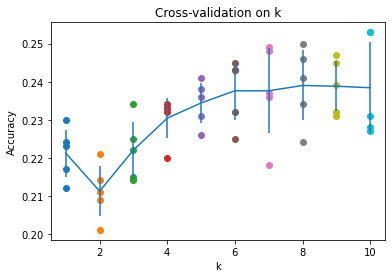

In [14]:
# plot observations
for k in range(1,11):
    accuracies = k_to_accuracies[k]
    print('k = %d,  Centroid Value = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

# plot trend line with error bars
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(range(1,11), accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()